# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (\$645-675) underperformed compared to schools with smaller budgets (<\$585 per student).

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (89-91% passing vs 67%).

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 









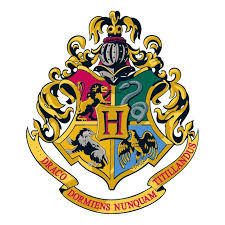
---

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [189]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [190]:
tot_schools = school_data_complete["school_name"].nunique()
tot_schools

tot_students = school_data_complete["Student ID"].nunique()
tot_students

tot_budget = school_data["budget"].sum()
tot_budget

avg_math = student_data["math_score"].mean()
avg_math

avg_reading = student_data["reading_score"].mean()
avg_reading

overall_avg = (avg_math + avg_reading)/2
overall_avg

student_data["pass_math"] = np.where(student_data["math_score"]>=70, 'yes', 'no')
student_data

student_data["pass_read"] = np.where(student_data["reading_score"]>=70, 'yes', 'no')
student_data

math_pass_ct = len(student_data[student_data['pass_math'] == 'yes'])
math_pass_ct
math_pass_pct = (math_pass_ct/tot_students) * 100
math_pass_pct

read_pass_ct = len(student_data[student_data['pass_read'] == 'yes'])
read_pass_ct
read_pass_pct = (read_pass_ct/tot_students) * 100
read_pass_pct


summary_table = pd.DataFrame({
                              "Total Schools": [tot_schools] ,
                              "Total Students": [tot_students],
                              "Total Budget": [tot_budget],
                              "Average Math Score": [avg_math],
                              "Average Reading Score": [avg_reading],
                              "Pct Passing Math": [math_pass_pct],
                              "Pct Passing Reading": [read_pass_pct],
                              "Pct Overall Passing": [overall_avg], 
                             })
summary_table


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,Pct Passing Math,Pct Passing Reading,Pct Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,80.431606


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [192]:
f1 = student_data.groupby("school_name")["math_score"].mean().reset_index(name="avg math")
f1

f2 = student_data.groupby("school_name")["reading_score"].mean().reset_index(name="avg reading")
f2

f3 = student_data[student_data["pass_math"] != 'no']
f4 = f3.groupby("school_name")["pass_math"].count().reset_index(name="pass math count")

f5 = student_data[student_data["pass_read"] != 'no']
f6 = f5.groupby("school_name")["pass_read"].count().reset_index(name="pass read count")

mf1 = pd.merge(school_data, f1)
mf1

mf2 = pd.merge(mf1, f2)
mf2

psb = school_data["budget"] / school_data["size"]
mf2["per student budget"] = psb

mf3 = pd.merge(mf2, f4)
mf3 

mf4 = pd.merge(mf3, f6)
mf4 

pmp = (mf4["pass math count"] / mf4["size"]) * 100
mf4["% passing math"] = pmp

prp = (mf4["pass read count"] / mf4["size"]) * 100
mf4["% passing reading"] = prp

opp = (mf4["% passing math"] + mf4["% passing reading"]) /2
mf4["% overall passing"] = opp
mf4

mf5 = mf4[["school_name", "type", "size","budget", "avg math", "avg reading", "per student budget", "% passing math", "% passing reading", "% overall passing"]].sort_values(by=["% overall passing"], ascending=False)
mf5.nlargest(5, "% overall passing")


,school_name,type,size,budget,avg math,avg reading,per student budget,% passing math,% passing reading,% overall passing
6,Cabrera High School,Charter,1858,1081356,83.061895,83.975780,582.0,94.133477,97.039828,95.586652
14,Thomas High School,Charter,1635,1043130,83.418349,83.848930,638.0,93.272171,97.308869,95.290520
9,Pena High School,Charter,962,585858,83.839917,84.044699,609.0,94.594595,95.945946,95.270270
4,Griffin High School,Charter,1468,917500,83.351499,83.816757,625.0,93.392371,97.138965,95.265668
5,Wilson High School,Charter,2283,1319574,83.274201,83.989488,578.0,93.867718,96.539641,95.203679


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [193]:
mf5.nsmallest (5, "% overall passing")

,school_name,type,size,budget,avg math,avg reading,per student budget,% passing math,% passing reading,% overall passing
11,Rodriguez High School,District,3999,2547363,76.842711,80.744686,637.0,66.366592,80.220055,73.293323
1,Figueroa High School,District,2949,1884411,76.711767,81.158020,639.0,65.988471,80.739234,73.363852
0,Huang High School,District,2917,1910635,76.629414,81.182722,655.0,65.683922,81.316421,73.500171
12,Johnson High School,District,4761,3094650,77.072464,80.966394,650.0,66.057551,81.222432,73.639992
13,Ford High School,District,2739,1763916,77.102592,80.746258,644.0,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [194]:
g9 = student_data[student_data["grade"] == '9th']
g9b = g9.groupby("school_name")["math_score"].mean().reset_index(name="9th").sort_values(by=["school_name"])
g9b

g10 = student_data[student_data["grade"] == '10th']
g10b = g10.groupby("school_name")["math_score"].mean().reset_index(name="10th").sort_values(by=["school_name"])
g10b

g11 = student_data[student_data["grade"] == '11th']
g11b = g11.groupby("school_name")["math_score"].mean().reset_index(name="11th").sort_values(by=["school_name"])
g11b

g12 = student_data[student_data["grade"] == '12th']
g12b = g12.groupby("school_name")["math_score"].mean().reset_index(name="12th").sort_values(by=["school_name"])
g12b

grade = pd.merge(g9b, g10b)
grade2 = pd.merge(grade, g11b)
grade3 = pd.merge(grade2, g12b)
grade3



,school_name,9th,10th,11th,12th
0,Bailey High School,77.083676,76.996772,77.515588,76.492218
1,Cabrera High School,83.094697,83.154506,82.765560,83.277487
2,Figueroa High School,76.403037,76.539974,76.884344,77.151369
3,Ford High School,77.361345,77.672316,76.918058,76.179963
4,Griffin High School,82.044010,84.229064,83.842105,83.356164
5,Hernandez High School,77.438495,77.337408,77.136029,77.186567
6,Holden High School,83.787402,83.429825,85.000000,82.855422
7,Huang High School,77.027251,75.908735,76.446602,77.225641
8,Johnson High School,77.187857,76.691117,77.491653,76.863248
9,Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [195]:
g9 = student_data[student_data["grade"] == '9th']
g9b = g9.groupby("school_name")["reading_score"].mean().reset_index(name="9th").sort_values(by=["school_name"])
g9b

g10 = student_data[student_data["grade"] == '10th']
g10b = g10.groupby("school_name")["reading_score"].mean().reset_index(name="10th").sort_values(by=["school_name"])
g10b

g11 = student_data[student_data["grade"] == '11th']
g11b = g11.groupby("school_name")["reading_score"].mean().reset_index(name="11th").sort_values(by=["school_name"])
g11b

g12 = student_data[student_data["grade"] == '12th']
g12b = g12.groupby("school_name")["reading_score"].mean().reset_index(name="12th").sort_values(by=["school_name"])
g12b

grade = pd.merge(g9b, g10b)
grade2 = pd.merge(grade, g11b)
grade3 = pd.merge(grade2, g12b)
grade3

,school_name,9th,10th,11th,12th
0,Bailey High School,81.303155,80.907183,80.945643,80.912451
1,Cabrera High School,83.676136,84.253219,83.788382,84.287958
2,Figueroa High School,81.198598,81.408912,80.640339,81.384863
3,Ford High School,80.632653,81.262712,80.403642,80.662338
4,Griffin High School,83.369193,83.706897,84.288089,84.013699
5,Hernandez High School,80.866860,80.660147,81.396140,80.857143
6,Holden High School,83.677165,83.324561,83.815534,84.698795
7,Huang High School,81.290284,81.512386,81.417476,80.305983
8,Johnson High School,81.260714,80.773431,80.616027,81.227564
9,Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [196]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

In [201]:
psb = school_data_complete["budget"] / school_data_complete["size"]
school_data_complete["per student budget"] = psb
school_data_complete.head()

school_data_complete["spending range per student"] = pd.cut(x=school_data_complete["per student budget"], bins=spending_bins, right=True, labels=group_names)
school_data_complete.head()

school_data_complete["pass_math"] = np.where(school_data_complete["math_score"]>=70, 'yes', 'no')
school_data_complete

school_data_complete["pass_read"] = np.where(school_data_complete["reading_score"]>=70, 'yes', 'no')
school_data_complete

sf1 = school_data_complete[student_data["pass_math"] != "no"]
sf2 = sf1.groupby("spending range per student")["pass_math"].count().reset_index(name="pass math count")
sf2

sf3 = school_data_complete[student_data["pass_read"] != "no"]
sf4 = sf3.groupby("spending range per student")["pass_read"].count().reset_index(name="pass read count")
sf4

sf5 = school_data_complete.groupby("spending range per student")["math_score"].mean().reset_index(name="avg math score")
sf5

sf6 = school_data_complete.groupby("spending range per student")["reading_score"].mean().reset_index(name="avg reading score")
sf6

sf7 = pd.merge(sf5, sf6)
sf8 = pd.merge(sf7, sf2)
sf8
sf9 = pd.merge(sf8, sf4)
sf9

sf10 = school_data_complete.groupby("spending range per student")["Student ID"].count().reset_index(name="spending range count")
sf10

sf11 = pd.merge(sf9, sf10)
sf11

pmp = (sf11["pass math count"] / sf11["spending range count"]) * 100
sf11["% passing math"] = pmp

prp = (sf11["pass read count"] / sf11["spending range count"]) * 100
sf11["% passing reading"] = prp
sf11

opp = (sf11["% passing math"] + sf11["% passing reading"]) /2
sf11["% overall passing"] = opp
sf11


sf12 = sf11[["spending range per student", "avg math score", "avg reading score", "% passing math", "% passing reading", "% overall passing"]]
sf12



,spending range per student,avg math score,avg reading score,% passing math,% passing reading,% overall passing
0,<$585,83.363065,83.964039,93.702889,96.686558,95.194724
1,$585-615,83.529196,83.838414,94.124128,95.886889,95.005509
2,$615-645,78.061635,81.434088,71.400428,83.614770,77.507599
3,$645-675,77.049297,81.005604,66.230813,81.109397,73.670105


## Scores by School Size

* Perform the same operations as above, based on school size.

In [202]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [208]:
school_data_complete["school size"] = pd.cut(x=school_data_complete["size"], bins=size_bins, right=True, labels=group_names)
school_data_complete.head()

szf1 = school_data_complete[student_data["pass_math"] != "no"]
szf2 = szf1.groupby("school size")["pass_math"].count().reset_index(name="pass math count")
szf2

szf3 = school_data_complete[student_data["pass_read"] != "no"]
szf4 = szf3.groupby("school size")["pass_read"].count().reset_index(name="pass read count")
szf4

szf5 = school_data_complete.groupby("school size")["math_score"].mean().reset_index(name="avg math score")
szf5

szf6 = school_data_complete.groupby("school size")["reading_score"].mean().reset_index(name="avg reading score")
szf6

szf7 = pd.merge(szf5, szf6)
szf8 = pd.merge(szf7, szf2)
szf8
szf9 = pd.merge(szf8, szf4)
szf9

szf10 = school_data_complete.groupby("school size")["Student ID"].count().reset_index(name="school size count")
szf10

szf11 = pd.merge(szf9, szf10)
szf11

pmp = (szf11["pass math count"] / szf11["school size count"]) * 100
szf11["% passing math"] = pmp

prp = (szf11["pass read count"] / szf11["school size count"]) * 100
szf11["% passing reading"] = prp
szf11

opp = (szf11["% passing math"] + szf11["% passing reading"]) /2
szf11["% overall passing"] = opp
szf11


szf12 = szf11[["school size", "avg math score", "avg reading score", "% passing math", "% passing reading", "% overall passing"]]
szf12


,school size,avg math score,avg reading score,% passing math,% passing reading,% overall passing
0,Small (<1000),83.828654,83.974082,93.952484,96.040317,94.996400
1,Medium (1000-2000),83.372682,83.867989,93.616522,96.773058,95.194790
2,Large (2000-5000),77.477597,81.198674,68.652380,82.125158,75.388769


## Scores by School Type

* Perform the same operations as above, based on school type.

In [220]:
csf1 = school_data_complete[student_data["pass_math"] != "no"]
csf2 = csf1.groupby("type")["pass_math"].count().reset_index(name="pass math count")
csf2

csf3 = school_data_complete[student_data["pass_read"] != "no"]
csf4 = csf3.groupby("type")["pass_read"].count().reset_index(name="pass read count")
csf4

csf5 = school_data_complete.groupby("type")["math_score"].mean().reset_index(name="avg math score")
csf5

csf6 = school_data_complete.groupby("type")["reading_score"].mean().reset_index(name="avg reading score")
csf6

csf7 = pd.merge(csf5, csf6)
csf8 = pd.merge(csf7, csf2)
csf8
csf9 = pd.merge(csf8, csf4)
csf9

csf10 = school_data_complete.groupby("type")["Student ID"].count().reset_index(name="type count")
csf10

csf11 = pd.merge(csf9, csf10)
csf11

pmp = (csf11["pass math count"] / csf11["type count"]) * 100
csf11["% passing math"] = pmp

prp = (csf11["pass read count"] / csf11["type count"]) * 100
csf11["% passing reading"] = prp
csf11

opp = (csf11["% passing math"] + csf11["% passing reading"]) /2
csf11["% overall passing"] = opp
csf11


csf12 = csf11[["type", "avg math score", "avg reading score", "% passing math", "% passing reading", "% overall passing"]]
csf12

,type,avg math score,avg reading score,% passing math,% passing reading,% overall passing
0,Charter,83.406183,83.902821,93.701821,96.645891,95.173856
1,District,76.987026,80.962485,66.518387,80.905249,73.711818
